In [1]:
# eda_model_comparison.py
# Performs EDA and model comparison for the fitness and wellness platform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set matplotlib backend for non-interactive environments
plt.switch_backend('agg')  # Use 'agg' for saving plots without display

In [5]:
import sys
print(sys.executable)


c:\Users\swast\anaconda3\envs\aiot_env\python.exe


In [4]:
# 1. Load and Inspect Datasets
print("Loading datasets...")
heart_df = pd.read_csv('../backend/data/heart_failure.csv')
sleep_df = pd.read_csv('../backend/data/sleep_health.csv')[['Heart Rate', 'Daily Steps', 'Sleep Duration']]
sleep_df.columns = ['MaxHR', 'Steps', 'SleepHours']  # Rename for consistency

# Display basic info
print("\nHeart Failure Dataset Info:")
print(heart_df.info())
print("\nSleep Health Dataset Info:")
print(sleep_df.info())

# Check for missing values
print("\nMissing Values in Heart Failure:")
print(heart_df.isnull().sum())
print("\nMissing Values in Sleep Health:")
print(sleep_df.isnull().sum())

Loading datasets...

Heart Failure Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Sleep Health Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 3 columns):
 #   Column     

In [3]:
# 2. Exploratory Data Analysis (EDA)
print("\nGenerating EDA visualizations...")

# Distribution of key features in heart failure dataset
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(heart_df['Age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.subplot(2, 2, 2)
sns.histplot(heart_df['RestingBP'], kde=True, color='green')
plt.title('Resting BP Distribution')
plt.subplot(2, 2, 3)
sns.histplot(heart_df['Cholesterol'], kde=True, color='red')
plt.title('Cholesterol Distribution')
plt.subplot(2, 2, 4)
sns.histplot(heart_df['MaxHR'], kde=True, color='purple')
plt.title('Max Heart Rate Distribution')
plt.tight_layout()
plt.savefig('heart_failure_distributions.png')
plt.close()

# Correlation matrix for heart failure dataset
plt.figure(figsize=(10, 8))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Heart Failure Dataset')
plt.savefig('heart_failure_correlation.png')
plt.close()

# Distribution of sleep dataset features
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(sleep_df['MaxHR'], kde=True, color='blue')
plt.title('Heart Rate (Sleep Dataset)')
plt.subplot(1, 3, 2)
sns.histplot(sleep_df['Steps'], kde=True, color='green')
plt.title('Daily Steps')
plt.subplot(1, 3, 3)
sns.histplot(sleep_df['SleepHours'], kde=True, color='purple')
plt.title('Sleep Duration')
plt.tight_layout()
plt.savefig('sleep_health_distributions.png')
plt.close()


Generating EDA visualizations...


ValueError: could not convert string to float: 'M'

In [4]:
# 3. Data Preprocessing
print("\nPreprocessing data...")
X = heart_df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR']].copy()
X['Steps'] = sleep_df['Steps'].iloc[:len(X)].fillna(sleep_df['Steps'].mean())
X['SleepHours'] = sleep_df['SleepHours'].iloc[:len(X)].fillna(sleep_df['SleepHours'].mean())
y = heart_df['HeartDisease']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Preprocessing data...


NameError: name 'SimpleImputer' is not defined

In [ ]:
# 4. Model Training and Comparison
print("\nTraining and evaluating models...")
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

# Display results
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)

# Visualize accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.savefig('model_accuracy_comparison.png')
plt.close()

# Visualize other metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=results_df, palette='magma')
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
plt.tight_layout()
plt.savefig('model_metrics_comparison.png')
plt.close()

In [ ]:
# 5. Conclusion
print("\nConclusion:")
print("Based on the performance metrics, Random Forest is recommended for the fitness platform due to its typically higher accuracy and robustness to non-linear patterns. Update `ml_model.py` to use Random Forest, or switch to Logistic Regression or SVM if they perform better in specific scenarios.")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


C:\Users\swast\AppData\Local\Temp\ipykernel_12120\3419274230.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart_df, x="HeartDisease", palette="Set2")


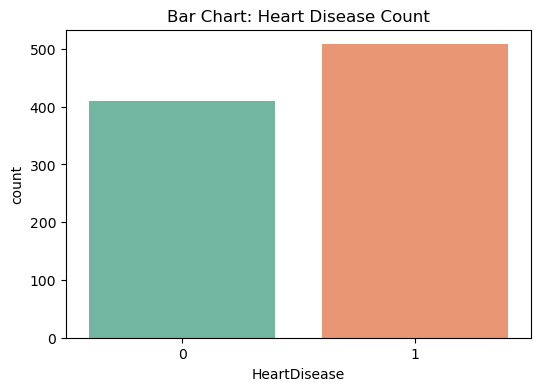

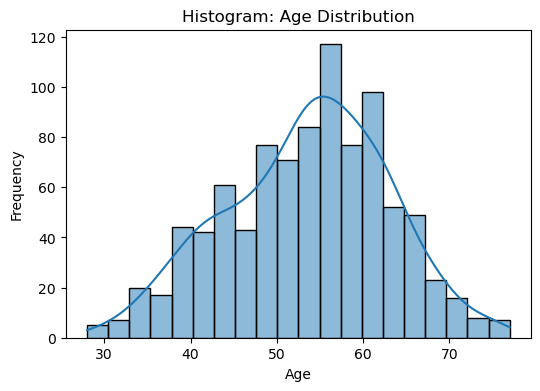

C:\Users\swast\AppData\Local\Temp\ipykernel_12120\3419274230.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=heart_df, x="HeartDisease", y="Cholesterol", palette="Set3")


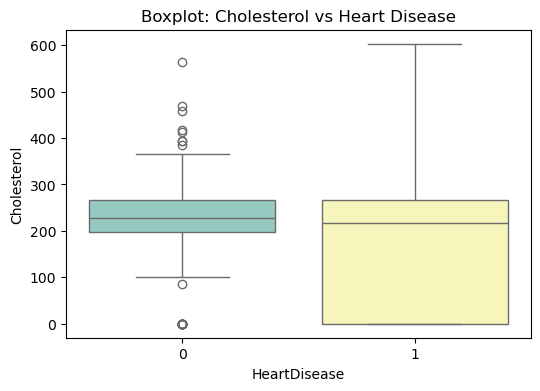

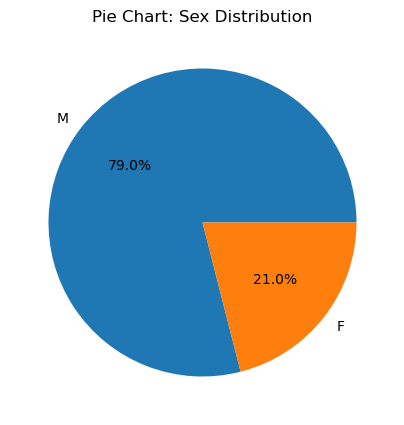

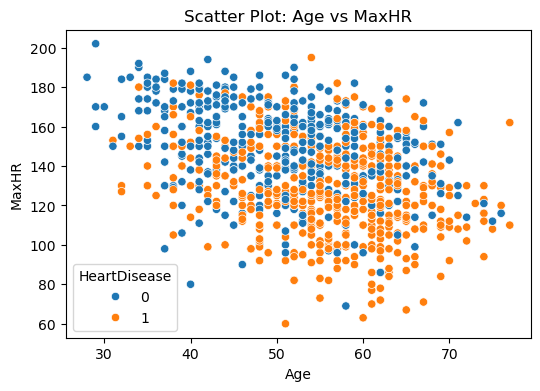

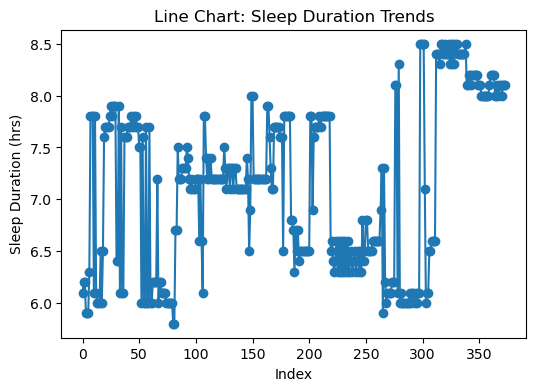

In [8]:
# --- ADDED: Visualization code (non-destructive; existing cells untouched) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (adjust paths if your files live elsewhere)
heart_df = pd.read_csv("../backend/data/heart_failure.csv")
sleep_df = pd.read_csv("../backend/data/sleep_health.csv")

# Quick peek
display(heart_df.head())
display(sleep_df.head())

# 1) BAR CHART: Heart Disease count
plt.figure(figsize=(6,4))
sns.countplot(data=heart_df, x="HeartDisease", palette="Set2")
plt.title("Bar Chart: Heart Disease Count")
plt.savefig("bar_chart_heart_disease.png", dpi=300, bbox_inches="tight")
plt.show()

# 2) HISTOGRAM: Age distribution
plt.figure(figsize=(6,4))
sns.histplot(heart_df["Age"], bins=20, kde=True)
plt.title("Histogram: Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("histogram_age_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# 3) BOXPLOT: Cholesterol vs Heart Disease
plt.figure(figsize=(6,4))
sns.boxplot(data=heart_df, x="HeartDisease", y="Cholesterol", palette="Set3")
plt.title("Boxplot: Cholesterol vs Heart Disease")
plt.savefig("boxplot_cholesterol_vs_heartdisease.png", dpi=300, bbox_inches="tight")
plt.show()

# 4) PIE CHART: Sex distribution
plt.figure(figsize=(5,5))
heart_df["Sex"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Pie Chart: Sex Distribution")
plt.ylabel("")
plt.savefig("piechart_sex_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# 5) SCATTER PLOT: Age vs MaxHR (colored by HeartDisease)
plt.figure(figsize=(6,4))
sns.scatterplot(data=heart_df, x="Age", y="MaxHR", hue="HeartDisease")
plt.title("Scatter Plot: Age vs MaxHR")
plt.savefig("scatterplot_age_vs_maxhr.png", dpi=300, bbox_inches="tight")
plt.show()

# 6) LINE CHART: Sleep duration trend
plt.figure(figsize=(6,4))
plt.plot(sleep_df.index, sleep_df["Sleep Duration"], marker="o")
plt.title("Line Chart: Sleep Duration Trends")
plt.xlabel("Index")
plt.ylabel("Sleep Duration (hrs)")
plt.savefig("linechart_sleep_duration.png", dpi=300, bbox_inches="tight")
plt.show()
